<img src="imgs\qiskitlogo.png" alt="Qiskit Logo" width="20%" height="10%">
<h2 style="color: rgb(0, 175, 100); text-align: center;">An Open Source SDK</h2>

<hr style="border-top: 2px solid rgb(0, 120, 60)" />

<h1 style="color: rgb(0, 125, 65)">Introduction</h1>

<hr style="border-top: 1px solid rgb(0, 120, 60)" />

<p> Qiskit , created by IBM, is an open-source  software development kit (SDK) for quantum computing. Its name's acronym stands for "Quantum Information Software Kit". It is used for working with quantum computers at the level of circuits, algorithms and application modules. It allows for anyone who is willing, to work on quantom computers from home PC's, laptops and other suitable devices. It gives the opportunity for developers, researchers or those just curiose to work in the world of quantum computing, creating things such as building quantum circuits and study quantum phenomena</p>

<h1 style="color: rgb(0, 125, 65)">Quantum Circuits</h1>

<hr style="border-top: 1px solid rgb(0, 120, 60)" />

<p>The fundamental unit of Qiskit is the quantum circuit, as discussed earlier. A basic workflow using Qiskit involves two main stages: Build and Run. The Build stage allows you to create various quantum circuits that represent the problem you are trying to solve. These circuits are created by arranging quantum gates to manipulate the states of qubits. Once the circuits are built, the Run stage allows you to execute them on different backends, which can be either quantum simulators or actual quantum hardware. After the jobs have been executed, the data collected is then postprocessed depending on the desired output. Therefore, working with Qiskit essentially involves creating quantum circuits to represent your problem, running them on the desired backend, and then postprocessing the collected data to obtain the final result.(https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html) </p>

<h2 style="color: rgb(0, 105, 65)">Circuit basics</h2>
<p><i>Using Qiskit documentation to build a basic quantum circuit</i> <br>
    We start by creating a QuantumCircuit comprised of 3 <b>qubits</b>. <br>
    A <b>qubit</b>, or 'quantum bit,' is the fundamental unit of quantuminformation. It is similar to a classical bit in computing, which can be either a 0 or a 1. However, a qubit can also exist in a state that is a superposition of both 0 and 1 simultaneously. This property allows the quantum computers to perform multiple calculations at once.<br>
<p>

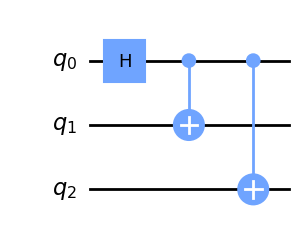

In [2]:
import numpy as np
from qiskit import QuantumCircuit

# Building the circuit

# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# We can visualise the circuit using QuantumCircuit.draw()
circ.draw('mpl')


<p>Once the circuit and its registers have been set up, gates (or "operations") can be added to modify the registers. The above is an illustration of a quantum circuit designed to generate a GHZ state across three qubits.<br>
In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).</p>

<h3 style="color: rgb(0, 105, 65)">Simulating Circuits</h3>
<p>Using quant_info module in qiskit to return the quantum state, the mathematical object that completely describes the condition of a quantum system.<br>
This is a complex vector of dimensions 2^N where N is the number of qubits. We must be carefull when scalling up the number of qubits as it will seriously increase the resources required</p>

In [3]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

<h3 style="color: rgb(0, 105, 65)">Another Quantum Circuit</h3>
<p><i>Using docs from IBM to build a basic quantum circuit</i><p>

In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Build
#------
 
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
 
# Add a H gate on qubit 0
circuit.h(0)
 
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)
 
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
 
# END

In [2]:
# Execute
#--------
 
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
 
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)
 
# Grab results from the job
result = job.result()
 
# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
 
# END


Total count for 00 and 11 are: {'11': 512, '00': 488}


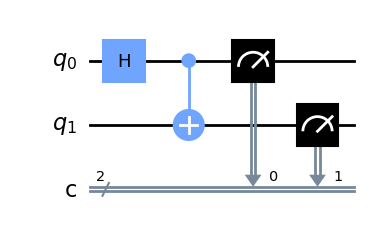

In [5]:
# Visualize
#----------
 
# Using QuantumCircuit.draw(), as in previous example
circuit.draw('mpl')
 

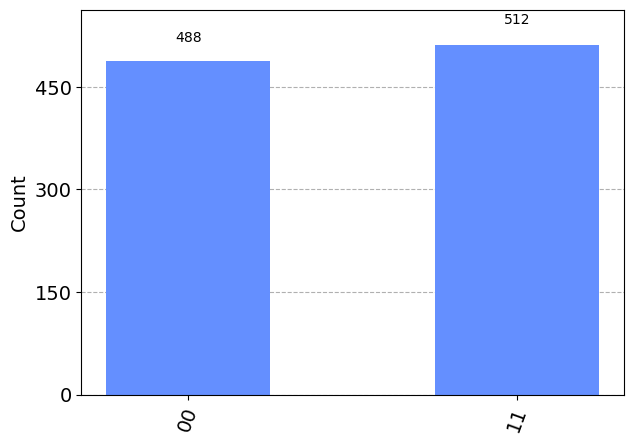

In [6]:
# Analyze
#--------
 
# Plot a histogram
plot_histogram(counts)

# END
